In [8]:
import numpy as np
import scipy.stats as sci
import matplotlib.pyplot as plt
import time

def driftmodeling(flynum, numberofbins, numberofdays, prefmean, prefvariance, envimean, envivariance, driftvariance, gain, per, deathrate, birthrate, matureage):
    x=np.linspace(-1,1,numberofbins)
    maxage=30
    pref=np.zeros((numberofbins,numberofdays,maxage))
    pref[:,0,0]=sci.norm.pdf(x,prefmean,prefvariance) # A gaussian of preference with center around 0
    pref[:,0,0]=pref[:,0,0]/np.sum(pref[:,0,0])*flynum # total # of flies=flynum
    #envi=gain*np.sin(x*2*np.pi/per+182*2*np.pi)+envimean
    # envi=gain*np.sin(x*2*np.pi/per+2*np.pi)+envimean
    # x=np.linspace(0, numberofdays, numberofbins)
    # envi=np.sin(x)+envimean
    # print(np.max(envi))
    envi=np.zeros((numberofbins,numberofdays))
    envi[:,0]=sci.norm.pdf(x,envimean,envivariance) # A gaussian of environment with center around 0
    # print(np.max(envi))
    envi=envi/(np.max(envi))*deathrate
    driftadvantage=np.zeros((numberofdays))
    for t in range(1,numberofdays):
        envi[:,t]=sci.norm.pdf(x,(envimean+gain*np.sin(t*np.pi*2/per)),envivariance)
        envi[:,t]=envi[:,t]/np.max(envi[:,t])*.95
        # print(driftadvantage[t])
        driftadvantage[t]=np.sum(np.multiply(np.sum(pref[:,t-1],1), envi[:,t]))
        tic=time.perf_counter()
        for a in range(maxage):
            for b in range(numberofbins):
                pref[:,t,a]+=pref[b,t-1,a]*sci.norm.pdf(x,x[b],driftvariance)/np.sum(sci.norm.pdf(x,x[b],driftvariance))
                pref[:,t,a]=np.multiply(pref[:,t,a], envi[:,t]) # Multiplying the preference to the environment
        toc=time.perf_counter()
        
        tik=time.perf_counter()
        driftadvantage[t]=np.sum(np.multiply(np.sum(pref[:,t],1), envi[:,t]))-driftadvantage[t]
        for a in range(maxage):
                if a>10:
                    pref[:,t,0]=pref[:,t,0]+pref[:,0,a]*birthrate/flynum*np.sum(pref[:,t,a])
        pref[:,t,1:]=pref[:,t,:-1]
        pref[:,t,0]=0
        plt.pcolormesh(np.log(pref[:,t,:]))
        plt.show()
        tok=time.perf_counter()
        print(toc-tic)
        print(tok-tik)
          
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1)
    fig.set_figwidth(8)
    fig.set_figheight(8)
    fig.tight_layout()
    plt.subplots_adjust(hspace=.6)
    c=ax0.pcolormesh(envi)
    fig.colorbar(c,ax=ax0)
    ax0.set_title('Environment (color is fraction of flies of given pref survive)')
    ax0.set_ylabel('Preference')
    ax0.set_xlabel('Day')

    c=ax1.pcolormesh(np.sum(pref,axis=2))
    fig.colorbar(c,ax=ax1)
    ax1.set_title('Fly Preference (color is log(num) flies each day)')
    ax1.set_ylabel('Preference')
    ax1.set_xlabel('Day')

    ax2.plot(np.log(np.sum(pref,axis=(0,2))))
    ax2.set_title('total log(num) flies)')
    ax2.set_ylabel('log(num) flies)')
    ax2.set_xlabel('Day')
    ax2.set_xlim(0,numberofdays)

    ax3.plot(driftadvantage/np.sum(pref,axis=(0,2)))
    ax3.set_title('Change in death rate due to drift ')
    ax3.set_ylabel('∆surviving flies/total flies')
    ax3.set_xlabel('Day')
    ax3.set_xlim(0,numberofdays)

    fig.colorbar(c,ax=ax2)
    fig.colorbar(c,ax=ax3)

    fig.suptitle('Bet-hedge variance: '+str(prefvariance)+', Drift variance: '+str(driftvariance), y=-.05, fontsize=16)

    plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log
<string>:6: UserWarning: Warning: converting a masked element to nan.
/opt/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


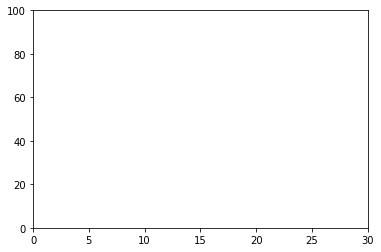

0.654473745999951
0.1104871310000135


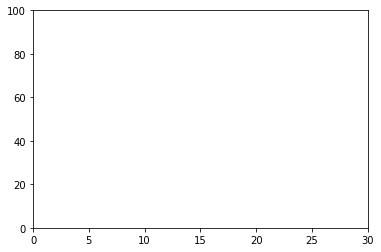

0.6639889880000283
0.10700011199998016


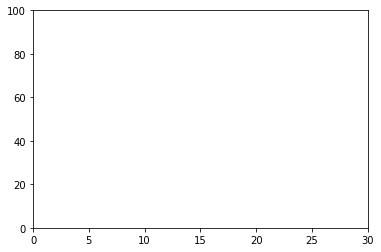

0.6509746859999836
0.10926032100002203


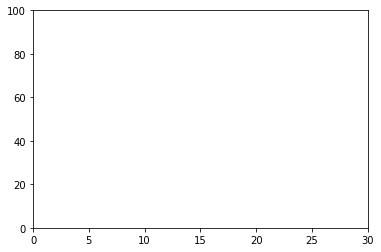

0.6675774550000142
0.10802344600000424


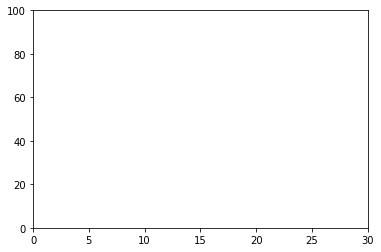

0.6343235170000412
0.10769864700000653


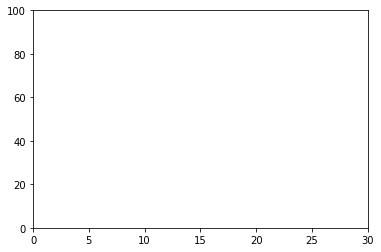

0.6409114540000473
0.11083571199998232


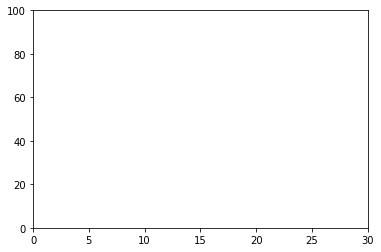

0.6432600059999913
0.1591952450000349


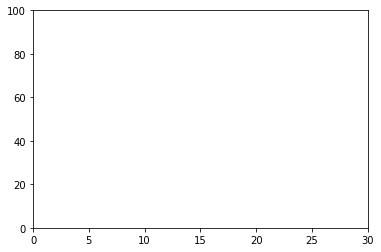

0.6733110260000217
0.12016394900001615


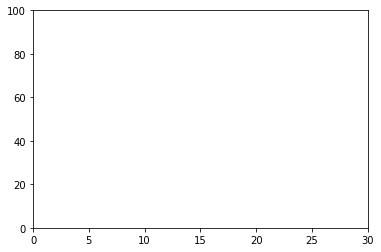

0.665115931999992
0.10908711800004767


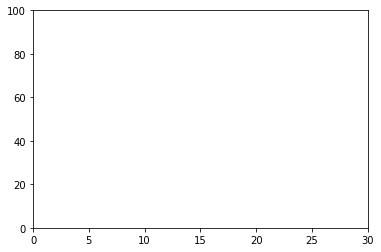

0.6608880850000105
0.10891290299997536


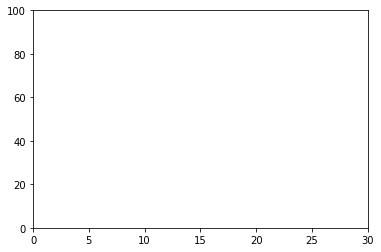

0.6541886620000241
0.10736594999997351


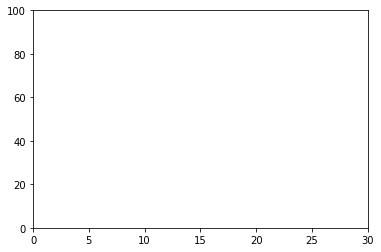

0.6377008979999914
0.10871299100000442


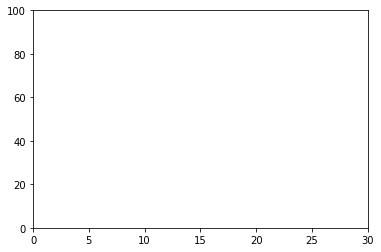

0.6473335680000218
0.10772179100001722


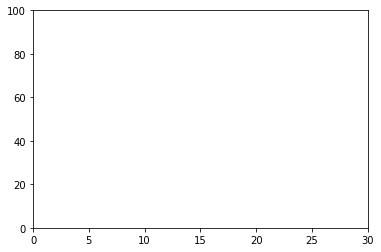

0.6399221389999639
0.1069167979999861


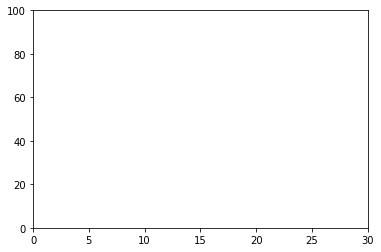

0.6435695010000018
0.10535517900001423


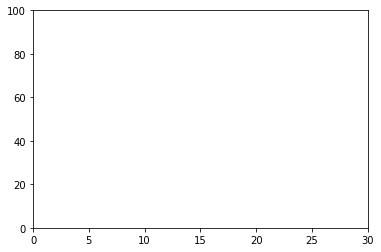

0.7051535570000169
0.11981681499997876


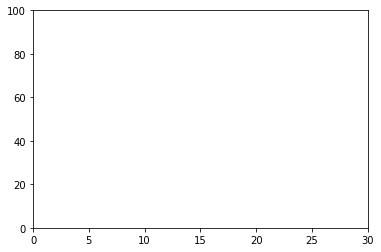

0.6907775060000176
0.11091756500002248


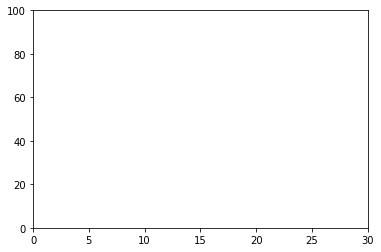

0.6384875660000375
0.15967676399998254


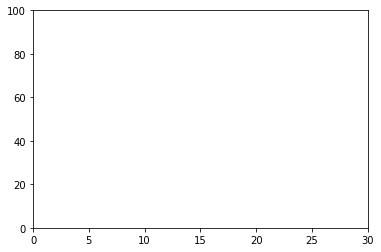

0.6651641120000136
0.11957836199997018


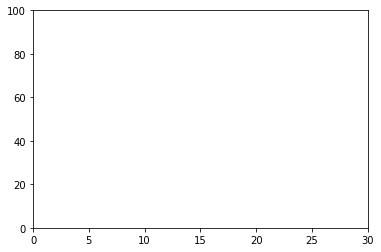

0.6610521879999851
0.10877293500004726


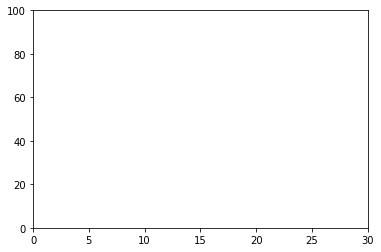

0.6375047289999998
0.11009411599997065


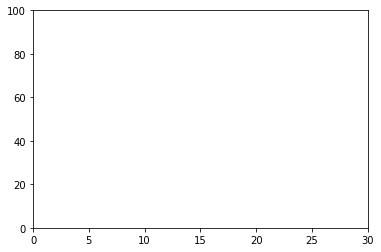

0.6307425140000191
0.10790313000001106


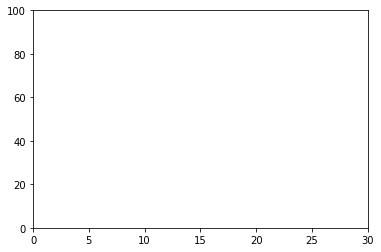

0.6451737020000223
0.1072371109999608


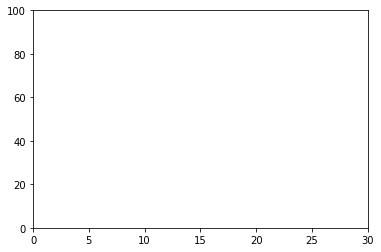

0.6443037479999703
0.10896564600000147


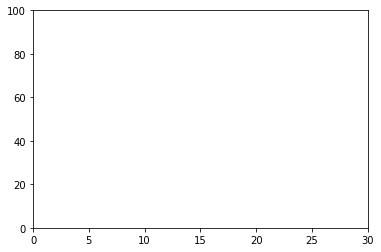

0.6493465909999827
0.1063061209999887


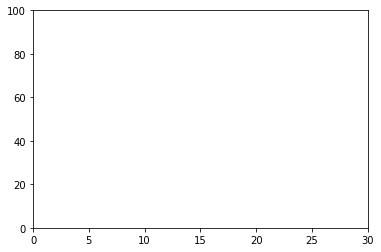

0.6442558159999976
0.10746658800002251


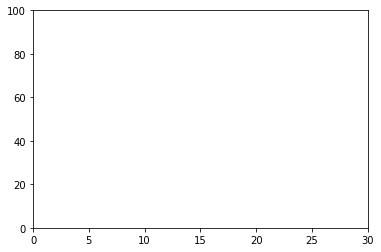

0.6388842860000068
0.10727655499999855


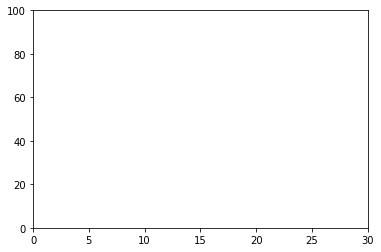

0.6323910799999908
0.10728014500000427


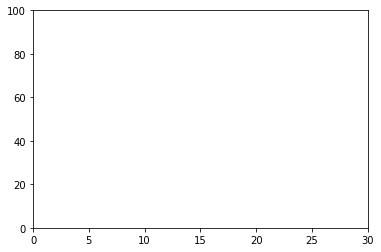

0.6468456499999888
0.149578871000017


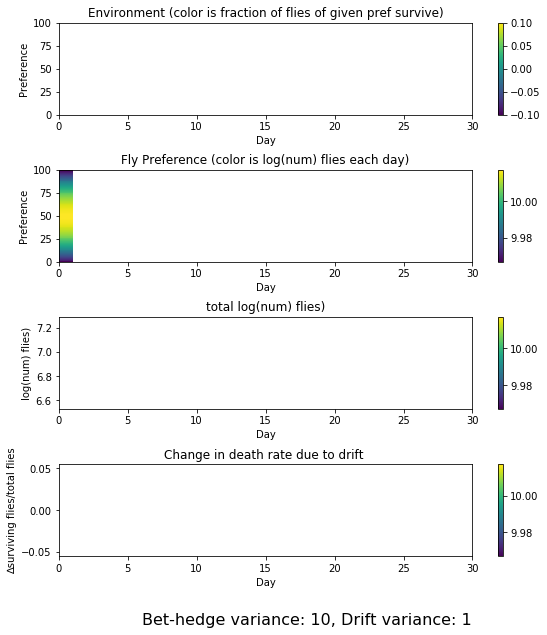

In [12]:
#driftmodeling(flynum, numberofbins, numberofdays, prefmean, prefvariance, envimean, envivariance, driftvariance, gain, per)
flynum=1000
numberofbins=100
numberofdays=30
prefmean=0
prefvariance=10
envimean=90
envivariance= .1
driftvariance=1
gain=.4
per=20
deathrate=.95
birthrate=1.05
matureage=10
driftmodeling(flynum, numberofbins, numberofdays, prefmean, prefvariance, envimean, envivariance, driftvariance, gain, per,deathrate,birthrate,matureage)